In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from scipy import stats
import torch
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from scipy.signal import find_peaks


In [158]:
def detect_hate_speech(text):
    """
    Detect hate speech in the given text using the Twitter RoBERTa hate speech model.
    
    Args:
        text (str): Input text to classify
    
    Returns:
        dict: Classification results with probabilities for each class
    """
    # Load pre-trained model and tokenizer
    model_name = "cardiffnlp/twitter-roberta-base-hate-latest"
    model = AutoModelForSequenceClassification.from_pretrained(model_name)
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    
    # Prepare the input
    inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=512)
    
    # Perform inference
    with torch.no_grad():
        outputs = model(**inputs)
        probabilities = torch.softmax(outputs.logits, dim=1)
    
    # Get class labels
    id2label = model.config.id2label
    
    # Create results dictionary
    results = {
        id2label[i]: prob.item() 
        for i, prob in enumerate(probabilities[0])
    }
    
    return results

In [159]:
# Perform the Dickey-Fuller test
def perform_dickey_fuller_test(series, name):
    result = adfuller(series.dropna())
    print(f"{name} Dickey-Fuller Test:")
    print("ADF Statistic: %f" % result[0])
    print("p-value: %f" % result[1])
    print("Critical Values:")
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    print("\n")

In [160]:
after = "Cleaned Data/New_After_NN_Cleaned.csv"
before = "Cleaned Data/New_Before_NN_Cleaned.csv"

after_df = pd.read_csv(after)
before_df = pd.read_csv(before)

corpus = after_df["After_Corpus"].to_list()

In [161]:
# class HateSpeechAnalyzer:
#     def __init__(self, model_name="cardiffnlp/twitter-roberta-base-hate-latest"):
#         """
#         Initialize hate speech detection model and tokenizer
#         """
#         self.model = AutoModelForSequenceClassification.from_pretrained(model_name)
#         self.tokenizer = AutoTokenizer.from_pretrained(model_name)
    
#     def detect_hate_speech(self, text):
#         """
#         Detect hate speech probability in given text
#         """
#         inputs = self.tokenizer(text, return_tensors="pt", truncation=True, max_length=512)
        
#         with torch.no_grad():
#             outputs = self.model(**inputs)
#             probabilities = torch.softmax(outputs.logits, dim=1)
        
#         # Assuming the 'hate' class is the second index
#         return probabilities[0][1].item()
    
#     def process_dataframe(self, df):
#         """
#         Process dataframe with hate speech detection and date parsing
#         """
#         # Deep copy to avoid modifying original
#         processed_df = df.copy()
        
#         # Apply hate speech detection to tweet column
#         processed_df['hate_speech_prob'] = processed_df['After_Corpus'].apply(self.detect_hate_speech)
        
#         # Parse dates and create a time reference point
#         processed_df['date'] = pd.to_datetime(processed_df['After_Dates'], format='%B %d, %Y %I:%M %p')
        
#         # Filter out dates before 10/07/2023
#         base_date = pd.to_datetime('2023-10-07')
#         processed_df = processed_df[processed_df['date'] >= base_date]
#         processed_df['time_index'] = (processed_df['date'] - base_date).dt.days
        
#         return processed_df
    
#     def plot_hate_speech_trend(self, df):
#         """
#         Create a line plot showing hate speech trend over time by Affiliation
#         """
#         plt.figure(figsize=(15, 8))
        
#         # Color mapping
#         color_map = {'Republican Party': 'red', 'Democratic Party': 'blue'}
        
#         # Group by time index and affiliation
#         grouped = df.groupby(['time_index', 'Affiliation'])['hate_speech_prob'].mean().reset_index()
        
#         # Plot for each party
#         for party in ['Republican Party', 'Democratic Party']:
#             party_data = grouped[grouped['Affiliation'] == party]
            
#             # Sort by time index to ensure proper line plotting
#             party_data = party_data.sort_values('time_index')
            
#             plt.plot(
#                 party_data['time_index'], 
#                 party_data['hate_speech_prob'], 
#                 color=color_map[party], 
#                 label=party,
#                 marker='o'
#             )
        
#         plt.title('Hate Speech Probability Trend Over Time by Political Affiliation', fontsize=16)
#         plt.xlabel('Days from Base Date (10/07/2024)', fontsize=12)
#         plt.ylabel('Average Hate Speech Probability', fontsize=12)
#         plt.legend(title='Political Party')
#         plt.grid(True, linestyle='--', alpha=0.7)
#         plt.tight_layout()
#         plt.show()

    

# # Initialize and run analysis
# analyzer = HateSpeechAnalyzer()
# processed_df = analyzer.process_dataframe(after_df)
# analyzer.plot_hate_speech_trend(processed_df)

In [162]:
# def plot_residuals(results):
#     plt.figure(figsize=(10, 6))
#     plt.plot(results.resid)
#     plt.title('Residuals')
#     plt.xlabel('Time')
#     plt.ylabel('Residuals')
#     plt.show()

In [163]:
class AdvancedHateSpeechAnalyzer:
    def __init__(self, model_name="cardiffnlp/twitter-roberta-base-hate-latest"):
        """
        Initialize hate speech detection model and time series analysis tools
        """
        self.model = AutoModelForSequenceClassification.from_pretrained(model_name)
        self.tokenizer = AutoTokenizer.from_pretrained(model_name)
    
    def detect_hate_speech(self, text):
        """
        Detect hate speech probability in given text
        """
        inputs = self.tokenizer(text, return_tensors="pt", truncation=True, max_length=512)
        
        with torch.no_grad():
            outputs = self.model(**inputs)
            probabilities = torch.softmax(outputs.logits, dim=1)
        
        # print(probabilities[0][1].item())

        return probabilities[0][1].item()
    
    def process_dataframe(self, df):
        """
        Process dataframe with hate speech detection and date parsing
        """
        processed_df = df.copy()
        
        # Apply hate speech detection
        processed_df['hate_speech_prob'] = processed_df['After_Corpus'].apply(self.detect_hate_speech)
        
        # Parse dates 
        processed_df['date'] = pd.to_datetime(processed_df['After_Dates'], format='%B %d, %Y %I:%M %p')
        
        # Filter out dates before 10/07/2023
        base_date = pd.to_datetime('2023-10-07')
        processed_df = processed_df[processed_df['date'] >= base_date]
        processed_df['time_index'] = (processed_df['date'] - base_date).dt.days
        
        # Sort by date
        processed_df = processed_df.sort_values('date')
        
        return processed_df
    
    def perform_time_series_analysis(self, df):
        """
        Perform comprehensive time series analysis
        """
        # Separate data by affiliation
        republican_data = df[df['Affiliation'] == 'Republican Party']
        democratic_data = df[df['Affiliation'] == 'Democratic Party']
        
        # Resample to daily mean hate speech probability
        republican_daily = republican_data.resample('D', on='date')['hate_speech_prob'].mean()
        democratic_daily = democratic_data.resample('D', on='date')['hate_speech_prob'].mean()
        both_daily = df.resample('D', on='date')['hate_speech_prob'].mean()
        
        # Perform statistical tests
        print("Statistical Analysis:")
        
        # Independent t-test
        t_stat, p_value = stats.ttest_ind(
            republican_data['hate_speech_prob'], 
            democratic_data['hate_speech_prob']
        )
        print(f"Independent T-Test:")
        print(f"t-statistic: {t_stat}")
        print(f"p-value: {p_value}")
        
        # Mann-Whitney U test (non-parametric)
        u_stat, u_p_value = stats.mannwhitneyu(
            republican_data['hate_speech_prob'], 
            democratic_data['hate_speech_prob'],
        )
        print(f"\nMann-Whitney U Test:")
        print(f"U-statistic: {u_stat}")
        print(f"p-value: {u_p_value}")
        
        # ARIMA Analysis
        def fit_arima(series):
            """Fit ARIMA model and return key diagnostics"""
            try:
                # Use auto ARIMA model selection
                model = sm.tsa.ARIMA(series, order=(1,1,1))
                results = model.fit()

                # plot_residuals(results)

                #Perform Ljung-Box test
                lb_test = sm.stats.acorr_ljungbox(results.resid, lags=[10], return_df=True)
                
                return {
                    'AIC': results.aic,
                    'BIC': results.bic,
                    'Residual Analysis': stats.normaltest(results.resid)[1],
                    'Ljung-Box p-value': lb_test.iloc[0]['lb_pvalue']
                }
            except Exception as e:
                return {"Error": str(e)}
        
        print("\nARIMA Model Diagnostics:")
        print("Right-leaning Affiliation ARIMA:", fit_arima(republican_daily))
        print("Left-leaning Affiliation ARIMA:", fit_arima(democratic_daily))
        print("Both Affiliations ARIMA:", fit_arima(both_daily))

        # Perform the Dickey-Fuller test for each series 
        perform_dickey_fuller_test(republican_daily, "Right-leaning Affiliation") 
        perform_dickey_fuller_test(democratic_daily, "Left-leaning Affiliation") 
        perform_dickey_fuller_test(both_daily, "Both Affiliations")

        #FINDING PEAKS
        # Find peaks in the Republican time series
        republican_peaks, _ = find_peaks(republican_daily.values, height=0)
        democratic_peaks, _ = find_peaks(democratic_daily.values, height=0)
        both_peaks, _ = find_peaks(both_daily.values, height=0)

        # Print the dates of the peaks
        republican_peak_dates = republican_daily.index[republican_peaks]
        democratic_peak_dates = democratic_daily.index[democratic_peaks]
        both_peak_dates = both_daily.index[both_peaks]

        print("Right-leaning Peaks:", republican_peak_dates)
        print("Left-leaning Peaks:", democratic_peak_dates)
        print("Both Peaks:", both_peak_dates)

        # Visualization
        
        # Subplot 1: Time Series Plot
        plt.figure(figsize=(15, 5))
        # plt.subplot(1, 1, 1)
        plt.plot(republican_daily.index, republican_daily.values, label='Right-leaning', color='red', alpha=0.3)
        plt.plot(democratic_daily.index, democratic_daily.values, label='Left-leaning', color='blue', alpha=0.3)
        plt.plot(both_daily.index, both_daily.values, label='General', color='green')
        plt.title('Daily Hate Speech Probability for Both Affiliation Groups')
        plt.xlabel('Date')
        plt.ylabel('Hate Speech Probability')
        plt.legend()
        plt.savefig('Graphs for Hate Speech/daily_hate_speech_probability.png', format='png')
        plt.show()
        
        # Subplot 2: Seasonal Decomposition

        # Combine series and fill missing values
        combined_series = pd.concat([republican_daily, democratic_daily, both_daily], axis=1)
        combined_series.columns = ['Right-leaning', 'Left-leaning', 'General']
        
        # Perform seasonal decomposition
        republican_decomp = sm.tsa.seasonal_decompose(republican_daily.fillna(method='ffill'))
        democratic_decomp = sm.tsa.seasonal_decompose(democratic_daily.fillna(method='ffill'))
        both_decomp = sm.tsa.seasonal_decompose(both_daily.fillna(method='ffill'))
        
        both_peaks_trend, _ = find_peaks(both_decomp.trend.values, height=0)
        both_peak__trend_dates = both_daily.index[both_peaks_trend]
        print("Both Peaks Trend:", both_peak__trend_dates)
        plt.figure(figsize=(15, 5))
        # plt.subplot(1, 1, 1)
        plt.plot(republican_decomp.trend.index, republican_decomp.trend.values, label='Right-leaning Trend', color='red', alpha=0.3)
        plt.plot(democratic_decomp.trend.index, democratic_decomp.trend.values, label='Left-leaning Trend', color='blue',alpha=0.3)
        plt.plot(both_decomp.trend.index, both_decomp.trend.values, label='General Trend', color='green')
        plt.title('Trend Component of Hate Speech Probability for Both Affiliation Groups')
        plt.xlabel('Date')
        plt.ylabel('Trend')
        plt.legend()
        plt.savefig('Graphs for Hate Speech/trend_component_hate_speech_probability.png', format='png')
        plt.show()

        plt.figure(figsize=(15, 10))
        # Republican
        plt.subplot(3, 1, 1)
        plt.plot(republican_daily.index, republican_daily.values, label='Right-leaning', color='red')
        plt.plot(republican_peak_dates, republican_daily.values[republican_peaks], "x")
        plt.title('Right-leaning Influencers Daily Hate Speech Probability with Peaks')
        plt.xlabel('Date')
        plt.ylabel('Hate Speech Probability')
        plt.legend()

        # Democratic
        plt.subplot(3, 1, 2)
        plt.plot(democratic_daily.index, democratic_daily.values, label='Left-leaning', color='blue')
        plt.plot(democratic_peak_dates, democratic_daily.values[democratic_peaks], "x")
        plt.title('Left-leaning Influencers Daily Hate Speech Probability with Peaks')
        plt.xlabel('Date')
        plt.ylabel('Hate Speech Probability')
        plt.legend()

        # Both
        plt.subplot(3, 1, 3)
        plt.plot(both_daily.index, both_daily.values, label='Both', color='green')
        plt.plot(both_peak_dates, both_daily.values[both_peaks], "x")
        plt.title('Both Parties Daily Hate Speech Probability with Peaks')
        plt.xlabel('Date')
        plt.ylabel('Hate Speech Probability')
        plt.legend()

        plt.tight_layout()
        plt.savefig('Graphs for Hate Speech/daily_hate_speech_probability_with_peaks.png', format='png')
        plt.show()
        
        return republican_daily, democratic_daily, both_daily

c:\Users\nhath\AppData\Local\Programs\Python\Python38\lib\site-packages\transformers\modeling_utils.py:367: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(c

Statistical Analysis:
Independent T-Test:
t-statistic: 2.174319929364458
p-value: 0.029856137993746337

Mann-Whitney U Test:
U-statistic: 234467.0
p-value: 0.000882117494420515

ARIMA Model Diagnostics:
Right-leaning Affiliation ARIMA: {'AIC': -110.38053068779453, 'BIC': -98.7138968127959, 'Residual Analysis': nan, 'Ljung-Box p-value': nan}
Left-leaning Affiliation ARIMA: {'AIC': -114.51322903940486, 'BIC': -102.83829640392754, 'Residual Analysis': nan, 'Ljung-Box p-value': nan}
Both Affiliations ARIMA: {'AIC': -183.51571123899765, 'BIC': -171.84077860352033, 'Residual Analysis': nan, 'Ljung-Box p-value': nan}
Right-leaning Affiliation Dickey-Fuller Test:
ADF Statistic: -14.434262
p-value: 0.000000
Critical Values:
	1%: -3.455
	5%: -2.873
	10%: -2.573


Left-leaning Affiliation Dickey-Fuller Test:
ADF Statistic: -9.100035
p-value: 0.000000
Critical Values:
	1%: -3.458
	5%: -2.874
	10%: -2.573


Both Affiliations Dickey-Fuller Test:
ADF Statistic: -15.199259
p-value: 0.000000
Critical V

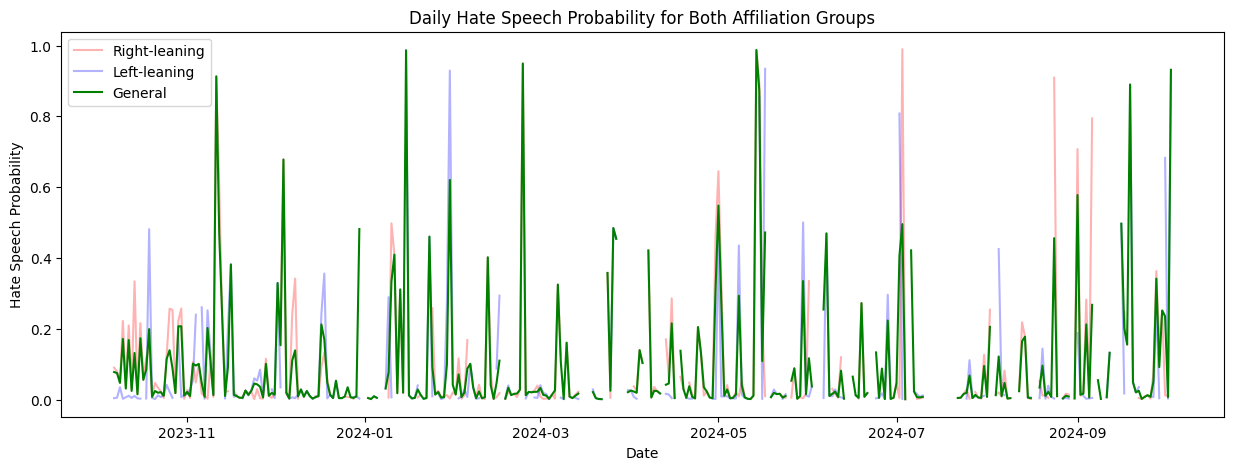

Both Peaks Trend: DatetimeIndex(['2023-10-11', '2023-10-13', '2023-10-16', '2023-10-19',
               '2023-10-22', '2023-10-24', '2023-10-28', '2023-11-01',
               '2023-11-06', '2023-11-11', '2023-11-14', '2023-11-18',
               '2023-11-25', '2023-12-01', '2023-12-05', '2023-12-10',
               '2023-12-19', '2023-12-25', '2023-12-29', '2024-01-01',
               '2024-01-12', '2024-01-16', '2024-01-22', '2024-01-27',
               '2024-02-01', '2024-02-09', '2024-02-14', '2024-02-18',
               '2024-02-22', '2024-02-27', '2024-03-05', '2024-03-08',
               '2024-03-13', '2024-03-16', '2024-03-27', '2024-03-29',
               '2024-04-04', '2024-04-07', '2024-04-12', '2024-04-16',
               '2024-04-21', '2024-04-24', '2024-04-29', '2024-05-01',
               '2024-05-03', '2024-05-17', '2024-05-24', '2024-05-29',
               '2024-06-02', '2024-06-04', '2024-06-13', '2024-06-19',
               '2024-06-22', '2024-06-25', '2024-06-30', '2

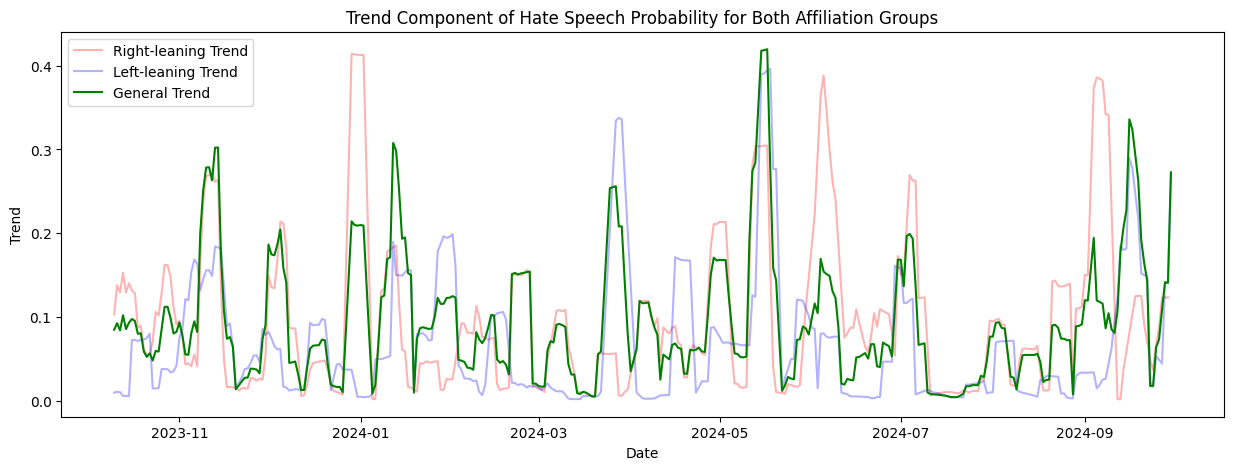

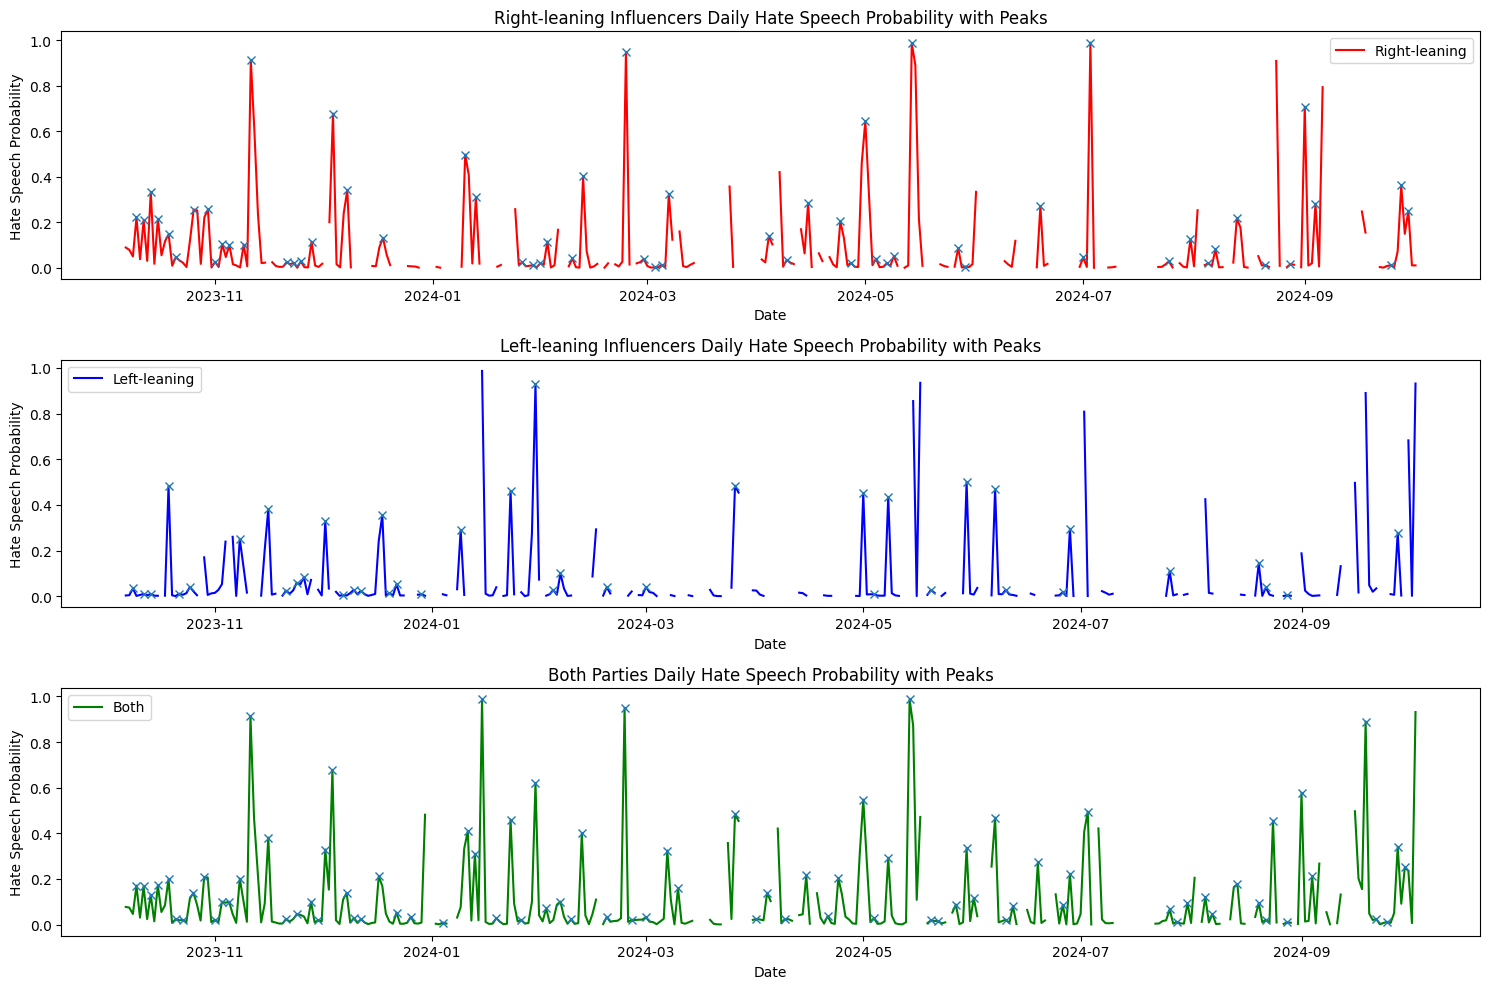

In [164]:
# Initialize analyzer
analyzer = AdvancedHateSpeechAnalyzer()

# Process dataframe
processed_df = analyzer.process_dataframe(after_df)

# Perform time series analysis
republican_series, democratic_series, both_daily = analyzer.perform_time_series_analysis(processed_df)